In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import re
import json
from pylab import *                                 #支持中文

In [5]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/81.0.4044.129 Safari/537.36'
}

def get_html(url):
    response = requests.get(url, headers)
    print(response.status_code)
    return response.text

def parse_html(html):
    # header 标题行，为0表示取消标题行
    data = pd.read_html(html, header=0,encoding='utf-8')[0] 
    return data

def data_save(data,filename):
    data.to_excel('%s.xlsx' % filename,sheet_name='空气质量指数')
    print(filename,'完成！')
    
def main():
    for city in ('wuhan', 'chengdu'):
        for report_time in range(202001,202006):
            url = 'http://www.tianqihoubao.com/aqi/%s-%d.html' % (city, report_time)
            html = get_html(url)
#             print(html)
            data = parse_html(html)
            filename = '%s-%d' % (city, report_time)
            data_save(data,filename)
#             print(data)
main()

200
wuhan-202001 完成！
200
wuhan-202002 完成！
200
wuhan-202003 完成！
200
wuhan-202004 完成！
200
wuhan-202005 完成！
200
chengdu-202001 完成！
200
chengdu-202002 完成！
200
chengdu-202003 完成！
200
chengdu-202004 完成！
200
chengdu-202005 完成！


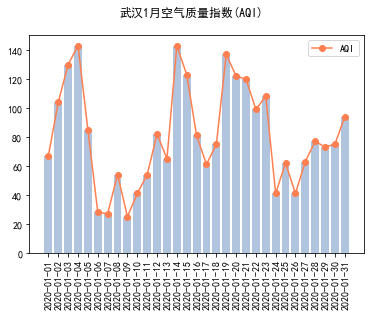

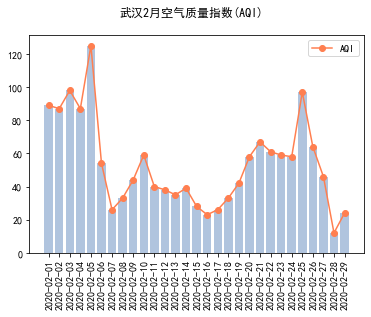

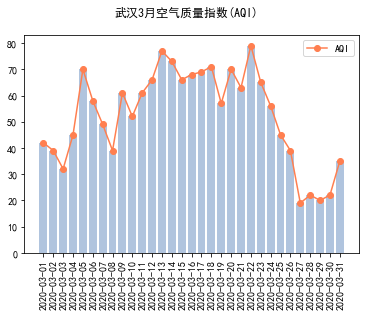

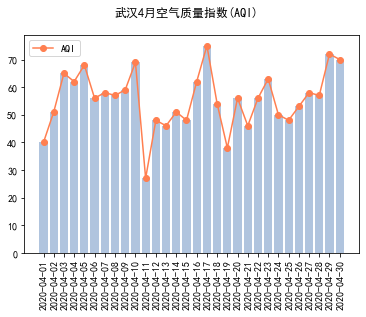

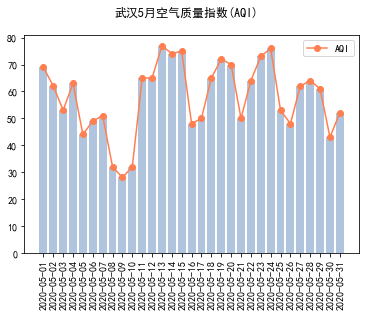

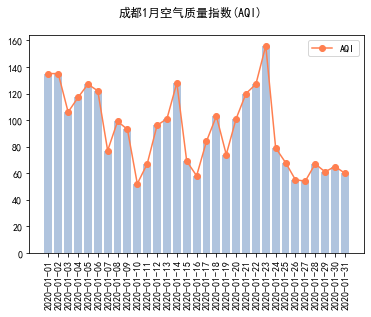

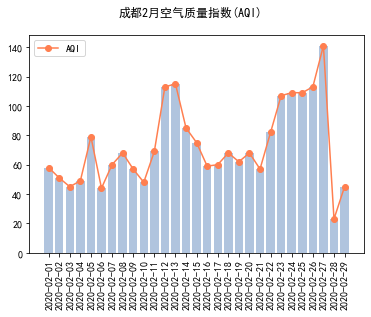

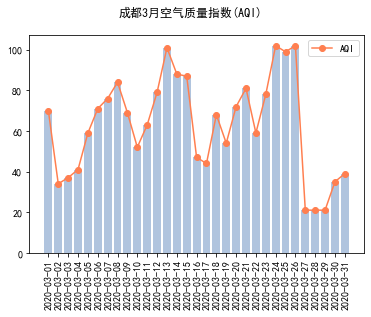

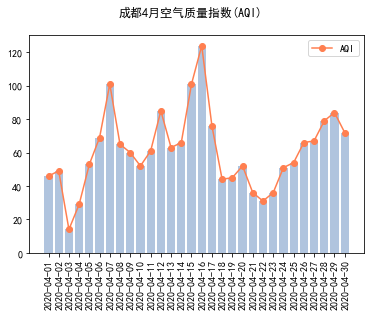

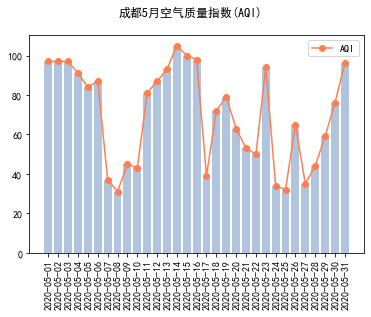

In [4]:
# 利用matplotlib可视化输出
mpl.rcParams['font.sans-serif'] = ['SimHei']


for city in ('wuhan', 'chengdu'):
        for report_time in range(202001,202006):
            filename = '%s-%d' % (city, report_time)
            df = pd.read_excel('%s.xlsx' % filename, header=0)
            x = df['日期']
            y = df['AQI指数']
            if city == 'wuhan':
                city_name = '武汉'
            elif city == 'chengdu':
                city_name = '成都'
            plt.suptitle('%s%s月空气质量指数(AQI)' % (city_name, str(report_time)[-1]))
            plt.bar(range(len(x)), y, color='lightsteelblue')
            plt.plot(range(len(x)), y, marker='o', color= 'coral')
            plt.xticks(range(len(x)),x)
            plt.xticks(rotation=90)
            plt.legend(['AQI'])
            plt.show()